In [2]:
# Libaries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from pandas.plotting import parallel_coordinates

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [5]:
data = pd.read_csv('/sephora_website_dataset.csv', engine='python')

# Explanatory analysis

In [ ]:
data.shape

(9168, 21)

In [ ]:
data.columns

Index(['id', 'brand', 'category', 'name', 'size', 'rating',
       'number_of_reviews', 'love', 'price', 'value_price', 'URL',
       'MarketingFlags', 'MarketingFlags_content', 'options', 'details',
       'how_to_use', 'ingredients', 'online_only', 'exclusive',
       'limited_edition', 'limited_time_offer'],
      dtype='object')

In [ ]:
data.dtypes

brand                  int64
category               int64
rating               float64
number_of_reviews      int64
love                   int64
price                float64
MarketingFlags         int64
details                int64
how_to_use             int64
ingredients           object
online_only            int64
exclusive              int64
agg_labels             int64
dtype: object

In [ ]:
data.head(4)
data.tail(4)

,brand,category,rating,number_of_reviews,love,price,MarketingFlags,details,how_to_use,ingredients,online_only,exclusive,agg_labels
9164,232,99,0.0,0,266,15.0,1,675,123,1,0,1,0
9165,232,137,0.0,0,445,16.0,1,641,443,1,0,1,0
9166,232,142,5.0,46,0,50.0,0,875,15,0,0,0,0
9167,232,142,0.0,0,0,50.0,0,1453,15,0,0,0,0


Profile report generated and downloaded

In [ ]:
# profile = ProfileReport(data, title="Pandas Profiling Report")

In [ ]:
# profile.to_file(r"C:\Users\ouykh\Documents\Ironhack\Final Project\sephora.html")

dropping the columns:

id / options / URL / MarketingFlags_content / limited_edition / limited_time_offer / name / size / value_price

In [6]:
data.drop(['id','options','URL','MarketingFlags_content','limited_edition','limited_time_offer','name','size','value_price'], axis=1, inplace=True)

In [7]:
data.isna().sum()

brand                0
category             0
rating               0
number_of_reviews    0
love                 0
price                0
MarketingFlags       0
details              0
how_to_use           0
ingredients          0
online_only          0
exclusive            0
dtype: int64

Encode the categorical columns : 
MarketingFlags / Brand / Category

In [9]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data_encode = data

label.fit(data_encode['MarketingFlags'])
label_name_mapping = dict(zip(label.classes_, label.transform(label.classes_)))
print(label_name_mapping)

data_encode['MarketingFlags']=label.fit_transform(data_encode['MarketingFlags'])

{0: 0, 1: 1}


In [10]:
label.fit(data_encode['brand'])
label_name_mapping = dict(zip(label.classes_, label.transform(label.classes_)))
print(label_name_mapping)

data_encode['brand']=label.fit_transform(data_encode['brand'])

{'8Greens': 0, 'AERIN': 1, 'ALTERNA Haircare': 2, 'AMOREPACIFIC': 3, 'Acqua Di Parma': 4, 'Aether Beauty': 5, 'Algenist': 6, 'Alpha-H': 7, 'Anastasia Beverly Hills': 8, 'Anthony': 9, 'Antonym': 10, 'Aquis': 11, 'Armani Beauty': 12, 'Artis': 13, 'Artist Couture': 14, 'Atelier Cologne': 15, 'BALENCIAGA': 16, 'BECCA': 17, 'BERDOUES': 18, 'BURBERRY': 19, 'BVLGARI': 20, 'Beachwaver': 21, 'BeautyBio': 22, 'Benefit Cosmetics': 23, 'Better Not Younger': 24, 'Bio Ionic': 25, 'Biossance': 26, 'Bite Beauty': 27, 'Black Up': 28, 'Blinc': 29, 'Bobbi Brown': 30, 'Briogeo': 31, 'Bumble and bumble': 32, 'Buxom': 33, 'By Rosie Jane': 34, 'Bésame Cosmetics': 35, 'CHANEL': 36, 'CLEAN RESERVE': 37, 'CLINIQUE': 38, 'COOLA': 39, 'COVER FX': 40, 'Calvin Klein': 41, 'Capri Blue': 42, 'Carolina Herrera': 43, 'Caudalie': 44, 'Cellu-cup': 45, 'Charlotte Tilbury': 46, 'Chloé': 47, 'Christian Louboutin': 48, 'Christophe Robin': 49, 'Ciaté London': 50, 'Cinema Secrets': 51, 'Clarins': 52, 'Clarisonic Skincare': 53,

In [11]:
label.fit(data_encode['category'])
label_name_mapping = dict(zip(label.classes_, label.transform(label.classes_)))
print(label_name_mapping)

data_encode['category']=label.fit_transform(data_encode['category'])

{'Accessories': 0, 'After Sun Care': 1, 'Aftershave': 2, 'Anti-Aging': 3, 'BB & CC Cream': 4, 'BB & CC Creams': 5, 'Bath & Body': 6, 'Bath & Shower': 7, 'Bath Soaks & Bubble Bath': 8, 'Beauty Supplements': 9, 'Blemish & Acne Treatments': 10, 'Blotting Papers': 11, 'Blush': 12, 'Body Lotions & Body Oils': 13, 'Body Mist & Hair Mist': 14, 'Body Moisturizers': 15, 'Body Products': 16, 'Body Sprays & Deodorant': 17, 'Body Sunscreen': 18, 'Body Wash & Shower Gel': 19, 'Bronzer': 20, 'Brush Cleaners': 21, 'Brush Sets': 22, 'Candles': 23, 'Candles & Home Scents': 24, 'Cellulite & Stretch Marks': 25, 'Cheek Palettes': 26, 'Cleansing Brushes': 27, 'Cologne': 28, 'Cologne Gift Sets': 29, 'Color Care': 30, 'Color Correct': 31, 'Concealer': 32, 'Conditioner': 33, 'Contour': 34, 'Curling Irons': 35, 'Curls & Coils': 36, 'Decollete & Neck Creams': 37, 'Deodorant & Antiperspirant': 38, 'Deodorant for Men': 39, 'Diffusers': 40, 'Dry Shampoo': 41, 'Exfoliators': 42, 'Eye Brushes': 43, 'Eye Cream': 44, 

Transform to numeric the columns 'online_only' and 'Exclusive'

In [12]:
data_encode['online_only'] = data_encode['online_only'].apply(pd.to_numeric, errors='coerce')
data_encode['exclusive'] = data_encode['exclusive'].apply(pd.to_numeric, errors='coerce')

Relabelling Rating values to get rid of decimal

In [13]:
data_encode["rating"].replace({4.5:8,4:7,3.5:6,3:5,2.5:4,2:3,1.5:2}, inplace=True)

In [14]:
data_encode.astype({'rating': 'int32'}).dtypes

brand                  int64
category               int64
rating                 int32
number_of_reviews      int64
love                   int64
price                float64
MarketingFlags         int64
details               object
how_to_use            object
ingredients           object
online_only            int64
exclusive              int64
dtype: object

Transform the 'details' and 'how to use' column to lenght of string

In [15]:
data_encode['details']= data_encode.details.str.len()
data_encode['how_to_use']= data_encode['how_to_use'].str.len()

Transform the 'ingredients' column from string to integer to show weither the ingredients were mentioned or not

In [16]:
data_encode['ingredients'].replace({'unknown': 0}, inplace=True)
data_encode.loc[data_encode["ingredients"] != 0, "ingredients"] = 1

In [17]:
data_encode.astype({'ingredients': 'int32'}).dtypes

brand                  int64
category               int64
rating               float64
number_of_reviews      int64
love                   int64
price                float64
MarketingFlags         int64
details                int64
how_to_use             int64
ingredients            int32
online_only            int64
exclusive              int64
dtype: object

In [ ]:
data_cleaned=data_encode.to_csv(r'C:\Users\ouykh\Documents\Ironhack\Final Project\data_clean.csv')

In [14]:
### Balance data

In [18]:
data_encode.rating.value_counts()

8.0    3527
7.0    2853
5.0    1180
6.0    1051
0.0     398
4.0      88
3.0      39
1.0      23
2.0       9
Name: rating, dtype: int64

In [ ]:
# pip install imbalanced-learn

In [19]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [20]:
data_encode_x = data_encode[data_encode.columns.difference(['rating'])]
data_encode_y = data_encode['rating']

In [21]:
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [("o", oversample), ("u", undersample)]
pipeline = Pipeline(steps=steps)
# transform the dataset
data_encode_x,data_encode_y = pipeline.fit_resample(data_encode_x,data_encode_y)

In [22]:
data_encode_y.value_counts()

0.0    3527
1.0    3527
2.0    3527
3.0    3527
4.0    3527
5.0    3527
6.0    3527
7.0    3527
8.0    3527
Name: rating, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data_encode_x,data_encode_y, test_size=0.2)

In [24]:
scaler = preprocessing.RobustScaler()
robust_x = scaler.fit_transform(X_train)
robust_x_test = scaler.transform(X_test)

# Modeling, Prediction, and Evaluation (Supervised Learning)

In [ ]:
# Best accuracy score is 83.6824696802646 % for the Random Forest Classifier

### LogisticRegression

In [ ]:
model = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
model.fit(robust_x, y_train)

score = model.score(robust_x_test,y_test)
y_pred = model.predict(robust_x_test)
matrix = confusion_matrix(y_test, y_pred)

print('The accuracy of the Logistic Regression is:', score * 100, '%')
sns.heatmap(matrix, annot=True)
#print('Confusion Matrix:\n',matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The accuracy of the Logistic Regression is: 37.48621830209482 %


### KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)
knn_matrix = confusion_matrix(y_test, knn_y_pred)
knn_score = knn.score(X_test,y_test)

print('The accuracy of the KNeighbors Classifier is:', knn_score * 100, '%')
print('Confusion Matrix:\n',knn_matrix)
plt.figure(figsize = (10,7))
sns.heatmap(knn_matrix, annot=True)
plt.show()

The accuracy of the KNeighbors Classifier is: 73.52338951015908 %
Confusion Matrix:
 [[661   3   2   6  10  10   9   3   2]
 [  1 706   2   1   1   1   5   0   0]
 [  0   0 701   1   1   0   0   0   0]
 [  3   2   0 673   3   7   7  18   3]
 [  6   3   7  10 604  10  12  15   3]
 [ 39  22  18  31  40 465  47  28  25]
 [ 12   6  19  20  28  56 459  43  32]
 [ 25  10   7  27  46 116 166 248 104]
 [ 19   6  15  28  41 115 154 169 151]]


### RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200, class_weight="balanced")
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)
acc_rfc = rfc.score(X_test, y_test)
rfc_matrix = confusion_matrix(y_test, rfc_y_pred)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
print('Confusion Matrix:\n',rfc_matrix)

The accuracy of the Random Forest Classifier is: 83.6824696802646 %
Confusion Matrix:
 [[723   0   0   0   0   0   0   0   0]
 [  0 712   0   0   0   0   0   0   0]
 [  0   0 717   0   0   0   0   0   0]
 [  0   1   0 697   1   0   0   0   0]
 [  0   1   0   1 695   2   1   0   3]
 [  0   4   1   8   7 565  38  41  43]
 [  0   0   1   2  22  59 514  72  35]
 [  0   0   0   1  12  57 103 329 175]
 [  0   0   0   1   7  70  61 206 361]]


### Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier(n_estimators=200)
ext.fit(X_train, y_train)
ext_y_pred = ext.predict(X_test)
acc_ext = ext.score(X_test, y_test)
ext_matrix = confusion_matrix(y_test, ext_y_pred)
print('The accuracy of the Extra Trees Classifier is:', acc_ext * 100, '%')
print('Confusion Matrix:\n',ext_matrix)

The accuracy of the Extra Trees Classifier is: 81.63490313435187 %
Confusion Matrix:
 [[708   1   0   3   1   6   0   2   2]
 [  0 711   0   0   0   1   0   0   0]
 [  0   0 717   0   0   0   0   0   0]
 [  0   0   0 699   0   0   0   0   0]
 [  3   1   0   0 691   3   2   2   1]
 [ 19   5   2  10  20 507  42  50  52]
 [  6   3   0  10  22  64 476  86  38]
 [  7   1   0   3  10  61  93 310 192]
 [  4   0   0   1   8  67  65 197 364]]


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier(n_estimators=500)
ext.fit(X_train, y_train)
ext_y_pred = ext.predict(X_test)
acc_ext = ext.score(X_test, y_test)
ext_matrix = confusion_matrix(y_test, ext_y_pred)
print('The accuracy of the Extra Trees Classifier is:', acc_ext * 100, '%')
print('Confusion Matrix:\n',ext_matrix)

The accuracy of the Extra Trees Classifier is: 81.96566388407624 %
Confusion Matrix:
 [[710   0   0   2   1   6   0   3   1]
 [  0 711   0   0   0   1   0   0   0]
 [  0   0 717   0   0   0   0   0   0]
 [  0   0   0 699   0   0   0   0   0]
 [  3   1   0   1 689   4   3   1   1]
 [ 14   6   2  10  19 512  46  44  54]
 [  6   4   0   9  18  65 481  81  41]
 [  7   1   0   2  10  56  99 315 187]
 [  4   0   0   1   9  69  64 189 370]]


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier(n_estimators=1000)
ext.fit(X_train, y_train)
ext_y_pred = ext.predict(X_test)
acc_ext = ext.score(X_test, y_test)
ext_matrix = confusion_matrix(y_test, ext_y_pred)
print('The accuracy of the Extra Trees Classifier is:', acc_ext * 100, '%')
print('Confusion Matrix:\n',ext_matrix)

The accuracy of the Extra Trees Classifier is: 81.63490313435187 %
Confusion Matrix:
 [[707   1   0   2   1   6   0   3   3]
 [  0 711   0   0   0   1   0   0   0]
 [  0   0 717   0   0   0   0   0   0]
 [  0   0   0 698   1   0   0   0   0]
 [  3   1   0   1 691   4   2   0   1]
 [ 14   4   2  12  17 506  49  44  59]
 [  7   4   0   6  18  61 486  81  42]
 [  6   1   0   3   9  57  95 310 196]
 [  4   0   0   1   7  71  64 202 357]]


### TPOT Automated Machine Learning tool

In [ ]:
import tpot
from tpot import TPOTClassifier

In [ ]:
model = TPOTClassifier(generations=2,mutation_rate=0.2, population_size=50, cv=5, scoring='accuracy', verbosity=3, n_jobs=-1)

In [ ]:
model.fit(X_train, y_train)

32 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/150 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True.

Generation 1 - Current Pareto front scores:

-1	0.7829408616796715	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.8, RandomForestClassifier__min_samples_leaf=8, RandomForestClassifier__min_samples_split=4, RandomForestClassifier__n_estimators=100)

-2	0.7940456812298725	RandomForestClassifier(MinMaxScaler(input_matrix), RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.35000000000000003, RandomForestClassifier__min_samples_leaf=6, RandomForestClassifier__min_samples_split=17, RandomForestClassifier__n_estimators=100)
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 

TPOTClassifier(generations=2, mutation_rate=0.2, n_jobs=-1, population_size=50,
               scoring='accuracy', verbosity=3)

In [ ]:
model2 = TPOTClassifier(generations=2,mutation_rate=0.9, population_size=50, cv=5, scoring='accuracy', verbosity=3, n_jobs=-1)

In [ ]:
model2.fit(X_train, y_train)

32 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/150 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only dual=False, got dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=1 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:ingredients.
_pre_test decorator: _random_mutation_operator: num_test=1 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
Skipped pipeli

TPOTClassifier(generations=2, n_jobs=-1, population_size=50, scoring='accuracy',
               verbosity=3)

# Unsupervised ML

### Unsupervised ML

In [25]:
from yellowbrick.cluster import KElbowVisualizer
import tkinter as tk
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_mutual_info_score, completeness_score, homogeneity_score, adjusted_rand_score, fowlkes_mallows_score

Elbow method to define number of clusters

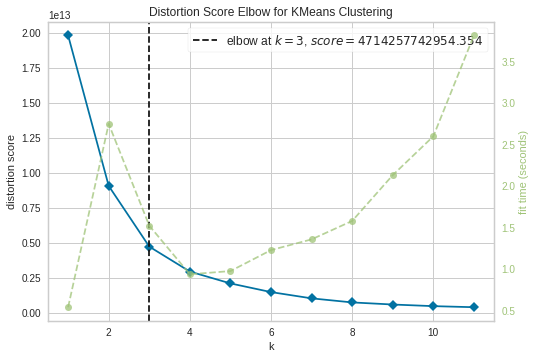

In [23]:
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (1,12))
visualizer.fit(data_encode_x)
visualizer.poof()

### Implementation and Results of unsupervised ML

Highest silhouette score for Agglomerative is 93% for 3 clusters

Highest silhouette score for KMeans is 92 for 3 clusters

-=- Agglomerative Clustering -=-

In [26]:
agg = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
agg.fit_predict(data_encode_x)
agg_labels = agg.labels_
print('Silhouette Coefficient for Agglomerative with 4 clusters is', silhouette_score(data_encode_x, agg_labels))

Silhouette Coefficient for Agglomerative with 4 clusters is 0.8356035802583114


In [27]:
agg2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
agg2.fit_predict(data_encode_x)
agg2_labels = agg2.labels_
print('Silhouette Coefficient for Agglomerative with 3 clusters is', silhouette_score(data_encode_x, agg2_labels))

Silhouette Coefficient for Agglomerative with 3 clusters is 0.9287998714166092


-=- Kmeans -=-

In [28]:
kmeans2 = KMeans(n_clusters=4, max_iter=100)
kmeans2.fit(data_encode_x)
y_kmeans2 = kmeans2.predict(data_encode_x)
y_kmeans2
print('Silhouette Coefficient for KMeans with 4 clusters is', silhouette_score(data_encode_x, y_kmeans2))

Silhouette Coefficient for KMeans with 4 clusters is 0.8732512392675


In [29]:
kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(data_encode_x)
y_kmeans = kmeans.predict(data_encode_x)
y_kmeans
print('Silhouette Coefficient for KMeans with 3 clusters is', silhouette_score(data_encode_x, y_kmeans))

Silhouette Coefficient for KMeans with 3 clusters is 0.920800692140329


-=- DBSCAN -=-

In [30]:
dbscan = DBSCAN(eps=50, min_samples=2,n_jobs=-1)
dbscan.fit(data_encode_x)
y_dbscan = dbscan.fit_predict(data_encode_x)
dbs= dbscan.labels_

In [31]:
unique_elements, counts_elements = np.unique(dbs, return_counts=True)
unique_elements
counts_elements

array([10389,    18,     5, ...,     2,     3,     2])

In [32]:
print('Silhouette score for DBSCAN is', silhouette_score(data_encode_x, y_dbscan))

Silhouette score for DBSCAN is -0.45344791564723624


In [ ]:
''' DBSCAN is not efficient''' 